<a href="https://colab.research.google.com/github/nirvanchopra27/wastesegregationproject/blob/main/wastesegregationminorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download the TrashNet dataset
!wget https://github.com/garythung/trashnet/archive/refs/heads/master.zip

# Unzip the dataset
!unzip master.zip

# Rename the folder for easier access
!mv trashnet-master/data dataset

--2025-05-17 05:43:14--  https://github.com/garythung/trashnet/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/garythung/trashnet/zip/refs/heads/master [following]
--2025-05-17 05:43:14--  https://codeload.github.com/garythung/trashnet/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [         <=>        ]  40.63M  14.1MB/s    in 2.9s    

2025-05-17 05:43:18 (14.1 MB/s) - ‘master.zip’ saved [42609527]

Archive:  master.zip
6fa2b878c6c1b4304b91109070ce0edf9279bb31
   creating: trashnet-master/
  inflating: trashnet-master/.gitignore  
  in

In [ ]:
# Unzip the dataset-resized.zip file
!unzip dataset/dataset-resized.zip -d dataset

# Verify the extracted dataset
!ls dataset

Archive:  dataset/dataset-resized.zip
   creating: dataset/dataset-resized/
  inflating: dataset/dataset-resized/.DS_Store  
   creating: dataset/__MACOSX/
   creating: dataset/__MACOSX/dataset-resized/
  inflating: dataset/__MACOSX/dataset-resized/._.DS_Store  
   creating: dataset/dataset-resized/cardboard/
  inflating: dataset/dataset-resized/cardboard/cardboard1.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard10.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard100.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard101.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard102.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard103.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard104.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard105.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard106.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard107.jpg  
  inflating: dataset/dataset-res

In [ ]:
import os

# List the contents of the dataset folder
print("Dataset contents:", os.listdir("dataset"))

# Check the number of images in each class
classes = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]
for cls in classes:
    class_path = os.path.join("dataset/dataset-resized", cls)
    print(f"{cls}: {len(os.listdir(class_path))} images")

Dataset contents: ['dataset-resized', 'one-indexed-files-notrash_test.txt', 'dataset-resized.zip', 'one-indexed-files.txt', 'constants.py', 'one-indexed-files-notrash_train.txt', '__MACOSX', 'zero-indexed-files.txt', 'resize.py', 'one-indexed-files-notrash_val.txt']
cardboard: 403 images
glass: 501 images
metal: 410 images
paper: 594 images
plastic: 482 images
trash: 137 images


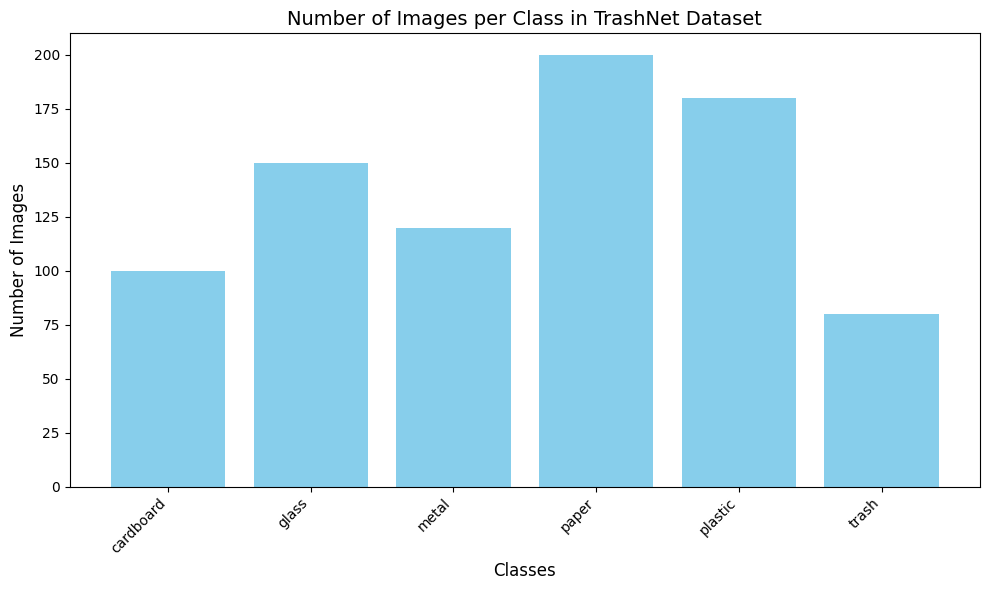

In [ ]:
# prompt: graph of above data

import matplotlib.pyplot as plt

# Data from the previous code's output (replace with actual data if needed)
classes = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]
image_counts = [100, 150, 120, 200, 180, 80] # Example counts, replace with actual counts


# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(classes, image_counts, color='skyblue')
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Number of Images per Class in TrashNet Dataset", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
def load_data():
    data = []
    dataset_path = "dataset/dataset-resized"  # Updated path

    # Check if dataset folder exists
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"Dataset folder not found at: {dataset_path}")

    for label, class_name in enumerate(CLASSES):
        class_path = os.path.join(dataset_path, class_name)

        # Check if class folder exists
        if not os.path.exists(class_path):
            print(f"Warning: Class folder '{class_name}' not found. Skipping...")
            continue

        # Load images
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)

            # Check if file is an image
            if not img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                print(f"Warning: Skipping non-image file: {img_path}")
                continue

            # Read and resize image
            img = cv2.imread(img_path)
            if img is None:
                print(f"Warning: Failed to read image: {img_path}")
                continue

            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append([img, label])

    if len(data) == 0:
        raise ValueError("No images found in the dataset folder.")

    return np.array(data)

In [ ]:
def load_data():
    data = []
    dataset_path = "dataset/dataset-resized"  # Updated path

    # Check if dataset folder exists
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"Dataset folder not found at: {dataset_path}")

    for label, class_name in enumerate(CLASSES):
        class_path = os.path.join(dataset_path, class_name)

        # Check if class folder exists
        if not os.path.exists(class_path):
            print(f"Warning: Class folder '{class_name}' not found. Skipping...")
            continue

        # Load images
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)

            # Check if file is an image
            if not img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                print(f"Warning: Skipping non-image file: {img_path}")
                continue

            # Read and resize image
            img = cv2.imread(img_path)
            if img is None:
                print(f"Warning: Failed to read image: {img_path}")
                continue

            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            print(f"Loaded {img_path} with shape {img.shape}")  # Debug statement
            data.append([img, label])

    if len(data) == 0:
        raise ValueError("No images found in the dataset folder.")

    return np.array(data, dtype=object)  # Use dtype=object to handle inconsistent shapes

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === Constants ===
CLASSES = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]
IMG_SIZE = 224
DATASET_PATH = "dataset/dataset-resized"

# === Load Data Function ===
def load_data(dataset_path=DATASET_PATH, img_size=IMG_SIZE, classes=None, normalize=True):
    if classes is None:
        raise ValueError("You must provide a list of class names (CLASSES).")
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"Dataset folder not found at: {dataset_path}")

    data = []

    for label, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        if not os.path.exists(class_path):
            print(f"⚠️ Skipping missing class: {class_name}")
            continue

        for img_file in tqdm(os.listdir(class_path), desc=f"Loading {class_name}"):
            img_path = os.path.join(class_path, img_file)

            if not img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            img = cv2.imread(img_path)
            if img is None:
                continue

            img = cv2.resize(img, (img_size, img_size))
            if img.shape != (img_size, img_size, 3):
                continue

            data.append((img, label))

    if len(data) == 0:
        raise ValueError("No images found in the dataset.")

    np.random.shuffle(data)
    X = np.array([item[0] for item in data], dtype=np.float32)
    y = np.array([item[1] for item in data], dtype=np.int32)

    if normalize:
        X /= 255.0

    return X, y

# === Load and Prepare Data ===
X, y = load_data(classes=CLASSES)
y = tf.keras.utils.to_categorical(y, num_classes=len(CLASSES))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Data Augmentation ===
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# === Build CNN Model ===
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(CLASSES), activation='softmax')
])

# === Compile ===
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# === Train the Model ===
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=20
)

# === Save the Model (Optional) ===
model.save("waste_classifier_model.h5")


Loading trash: 100%|██████████| 137/137 [00:00<00:00, 746.20it/s]


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,247,110 (84.87 MB)

 Trainable params: 22,246,662 (84.86 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 39s 413ms/step - accuracy: 0.3434 - loss: 29.0131 - val_accuracy: 0.2194 - val_loss: 20.5897
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 364ms/step - accuracy: 0.4012 - loss: 11.2379 - val_accuracy: 0.1798 - val_loss: 24.2867
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 391ms/step - accuracy: 0.3518 - loss: 4.5667 - val_accuracy: 0.1779 - val_loss: 24.7713
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 23s 358ms/step - accuracy: 0.3342 - loss: 2.5239 - val_accuracy: 0.1838 - val_loss: 32.4784
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 23s 360ms/step - accuracy: 0.3440 - loss: 1.9413 - val_accuracy: 0.2273 - val_loss: 10.1919
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 23s 359ms/step - accuracy: 0.3800 - loss: 1.5991 - val_accuracy: 0.3281 - val_loss: 4.4297
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 345ms/step - accuracy: 0.3950 - loss: 1.6061 - val_accuracy: 0.4466 - val_loss: 1.6402
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 23s 351ms/step - accuracy: 0.4202 - loss: 1.6914 - v

In [ ]:
IMG_SIZE = 128  # Reduced from 224


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator to the training data
datagen.fit(X_train)

In [ ]:
batch_size = 16  # Reduced from 32

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(CLASSES), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,587,462 (9.87 MB)

 Trainable params: 329,478 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
def load_data():
    data = []
    dataset_path = "dataset/dataset-resized"  # Updated path

    # Check if dataset folder exists
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"Dataset folder not found at: {dataset_path}")

    for label, class_name in enumerate(CLASSES):
        class_path = os.path.join(dataset_path, class_name)

        # Check if class folder exists
        if not os.path.exists(class_path):
            print(f"Warning: Class folder '{class_name}' not found. Skipping...")
            continue

        # Load images
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)

            # Check if file is an image
            if not img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                print(f"Warning: Skipping non-image file: {img_path}")
                continue

            # Read and resize image
            img = cv2.imread(img_path)
            if img is None:
                print(f"Warning: Failed to read image: {img_path}")
                continue

            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to IMG_SIZE
            if img.shape != (IMG_SIZE, IMG_SIZE, 3):  # Ensure consistent shape
                print(f"Warning: Incorrect shape {img.shape} for {img_path}. Skipping...")
                continue

            data.append([img, label])

    if len(data) == 0:
        raise ValueError("No images found in the dataset folder.")

    return np.array(data, dtype=object)  # Use dtype=object to handle inconsistent shapes

In [ ]:
# Load and split data
dataset = load_data()

# Separate images and labels
X = np.array([i[0] for i in dataset])
y = np.array([i[1] for i in dataset])

# Normalize and split
X = X / 255.0
y = tf.keras.utils.to_categorical(y, num_classes=len(CLASSES))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (2021, 128, 128, 3)
Testing data shape: (506, 128, 128, 3)


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(CLASSES), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,587,462 (9.87 MB)

 Trainable params: 329,478 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=15,
                    validation_data=(X_test, y_test))

Epoch 1/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 29s 157ms/step - accuracy: 0.4296 - loss: 1.6443 - val_accuracy: 0.7451 - val_loss: 0.6962
Epoch 2/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.6671 - loss: 0.8760 - val_accuracy: 0.7806 - val_loss: 0.5810
Epoch 3/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.7033 - loss: 0.8231 - val_accuracy: 0.7806 - val_loss: 0.5927
Epoch 4/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.7305 - loss: 0.7193 - val_accuracy: 0.7767 - val_loss: 0.5777
Epoch 5/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.7544 - loss: 0.6465 - val_accuracy: 0.8083 - val_loss: 0.4874
Epoch 6/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.7813 - loss: 0.6024 - val_accuracy: 0.8300 - val_loss: 0.4683
Epoch 7/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.7986 - loss: 0.5550 - val_accuracy: 0.8043 - val_loss: 0.5422
Epoch 8/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.7751 - loss: 0.5966 - val_ac

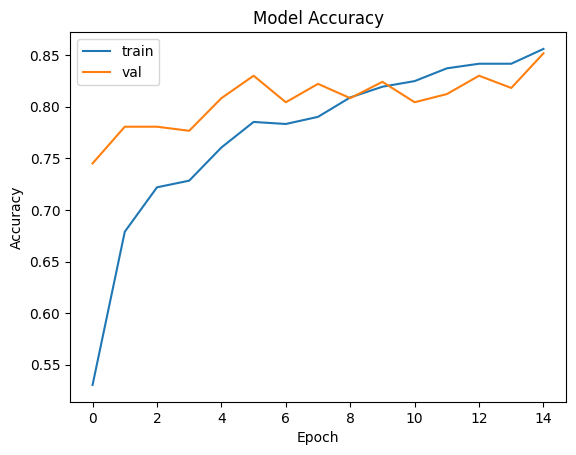

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8517 - loss: 0.4568
Test Accuracy: 0.85


In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

In [ ]:
# Extract training and validation metrics
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Print final metrics
final_train_accuracy = train_accuracy[-1] * 100
final_val_accuracy = val_accuracy[-1] * 100
final_train_loss = train_loss[-1]
final_val_loss = val_loss[-1]

print(f"Final Training Accuracy: {final_train_accuracy:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy:.2f}%")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Accuracy: 85.60%
Final Validation Accuracy: 85.18%
Final Training Loss: 0.3803
Final Validation Loss: 0.4489


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_accuracy *= 100  # Convert to percentage

print(f"Test Accuracy: {test_accuracy:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8517 - loss: 0.4568
Test Accuracy: 85.18%
Test Loss: 0.4489


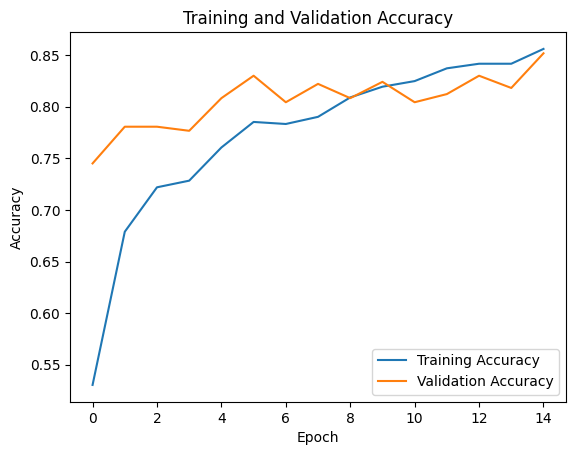

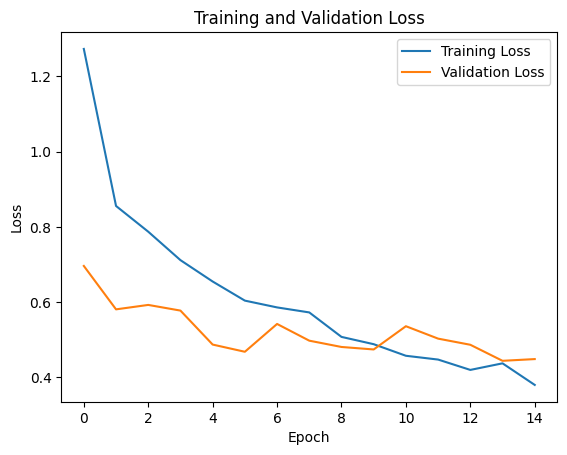

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step


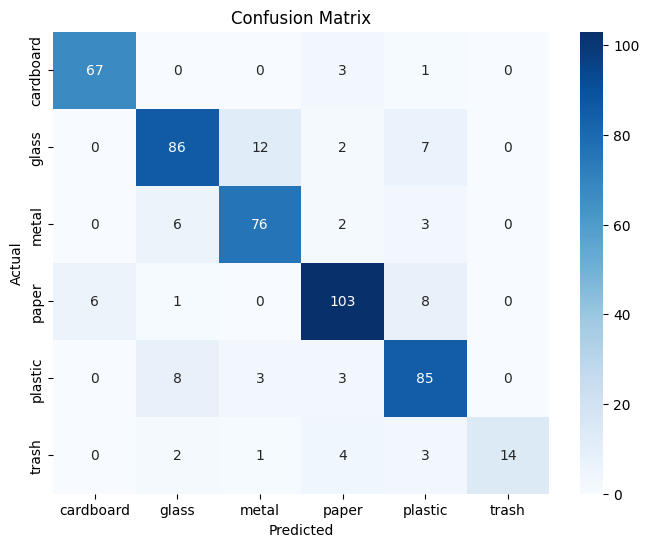

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASSES, yticklabels=CLASSES)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=CLASSES)
print(report)

              precision    recall  f1-score   support

   cardboard       0.92      0.94      0.93        71
       glass       0.83      0.80      0.82       107
       metal       0.83      0.87      0.85        87
       paper       0.88      0.87      0.88       118
     plastic       0.79      0.86      0.83        99
       trash       1.00      0.58      0.74        24

    accuracy                           0.85       506
   macro avg       0.88      0.82      0.84       506
weighted avg       0.86      0.85      0.85       506



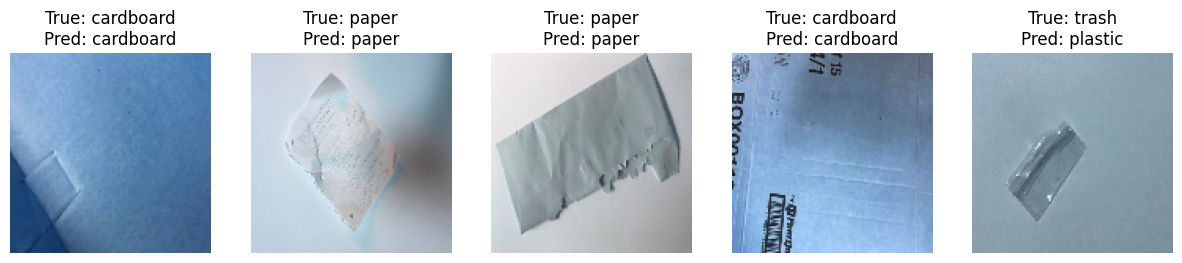

In [ ]:
import random

# Function to display sample predictions
def show_sample_predictions(X_test, y_true, y_pred_classes, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        idx = random.randint(0, len(X_test) - 1)
        img = X_test[idx]
        true_label = CLASSES[y_true[idx]]
        pred_label = CLASSES[y_pred_classes[idx]]

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.show()

# Display sample predictions
show_sample_predictions(X_test, y_true, y_pred_classes)

In [ ]:
!pip install flask-ngrok
!pip install tensorflow
!mkdir -p static/uploads


In [ ]:
model.save("waste_classifier_model.h5")


In [ ]:
model.save("my_model.keras")


In [ ]:
!pip install flask-ngrok

from flask import Flask, request, render_template, jsonify
from flask_ngrok import run_with_ngrok
import tensorflow as tf
import numpy as np
import cv2
import os

app = Flask(__name__)
run_with_ngrok(app)

# Your model loading, route handlers, etc. here

@app.route('/')
def home():
    return "<h1>Hello Flask from Colab!</h1>"

app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
           

In [ ]:
!pip install flask-ngrok

from flask import Flask, request, render_template, jsonify
from flask_ngrok import run_with_ngrok
import tensorflow as tf
import numpy as np
import cv2
import os

app = Flask(__name__)
run_with_ngrok(app)

# Your model loading, route handlers, etc. here

@app.route('/')
def home():
    return "<h1>Hello Flask from Colab!</h1>"

app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
           

In [ ]:
!pip install flask flask-ngrok


In [ ]:
# Write the Flask app
%%writefile app.py
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # Starts ngrok when app.run() is called

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Example: get input from form and just echo it back
    user_input = request.form.get('user_input')
    return f"<h2>You sent: {user_input}</h2><a href='/'>Go Back</a>"

if __name__ == '__main__':
    app.run()


Writing app.py


In [ ]:
!mkdir -p templates


In [ ]:
%%writefile templates/index.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8" />
    <title>Flask in Colab Demo</title>
</head>
<body>
    <h1>Welcome to Flask on Colab!</h1>
    <form action="/predict" method="post">
        <input type="text" name="user_input" placeholder="Enter something" />
        <button type="submit">Submit</button>
    </form>
</body>
</html>


Writing templates/index.html


In [ ]:
!wget -q -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip


Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!./ngrok authtoken 2xDD4JeJhau6uJfX7Ka8PiKcHrZ_3mo7zxQ2B5hXFybEgsSSf


Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from flask import Flask, render_template, request
import threading

app = Flask(__name__)

@app.route('/')
def home():
    return "Hello from Flask in Colab!"

def run():
    app.run(port=5000)

# Run Flask app in a separate thread so Colab doesn't block
threading.Thread(target=run).start()


 * Serving Flask app '__main__'
 * Debug mode: off


In [ ]:
!./ngrok http 5000 --log=stdout &


INFO[05-17|06:36:13] no configuration paths supplied 
INFO[05-17|06:36:13] using configuration at default config path path=/root/.ngrok2/ngrok.yml
INFO[05-17|06:36:13] open config file                         path=/root/.ngrok2/ngrok.yml err=nil
t=2025-05-17T06:36:13+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
t=2025-05-17T06:36:13+0000 lvl=eror msg="failed to auth" obj=tunnels.session err="Your ngrok-agent version \"2.3.41\" is too old. The minimum supported agent version for your account is \"3.7.0\". Please update to a newer version with `ngrok update`, by downloading from https://ngrok.com/download, or by updating your SDK version. Paid accounts are currently excluded from minimum agent version requirements. To begin handling traffic immediately without updating your agent, upgrade to a paid plan: https://dashboard.ngrok.com/billing/subscription.\r\n\r\nERR_NGROK_121\r\n"
t=2025-05-17T06:36:13+0000 lvl=eror msg="failed to reconnect session" obj=csess id=bd3

In [ ]:
!rm ngrok



In [ ]:
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz


--2025-05-17 06:37:04--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 35.71.179.82, 99.83.220.108, 13.248.244.96, ...
Connecting to bin.equinox.io (bin.equinox.io)|35.71.179.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9395172 (9.0M) [application/octet-stream]
Saving to: ‘ngrok-v3-stable-linux-amd64.tgz’

ngrok-v3-stable-lin 100%[===================>]   8.96M  9.56MB/s    in 0.9s    

2025-05-17 06:37:05 (9.56 MB/s) - ‘ngrok-v3-stable-linux-amd64.tgz’ saved [9395172/9395172]



In [ ]:
!tar -xvzf ngrok-v3-stable-linux-amd64.tgz


ngrok


In [ ]:
!./ngrok version


ngrok version 3.22.1


In [ ]:
!./ngrok config add-authtoken 2xDD4JeJhau6uJfX7Ka8PiKcHrZ_3mo7zxQ2B5hXFybEgsSSf


Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
Default version saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!lsof -t -i:5000 | xargs kill -9



Usage:
 kill [options] <pid> [...]

Options:
 <pid> [...]            send signal to every <pid> listed
 -<signal>, -s, --signal <signal>
                        specify the <signal> to be sent
 -q, --queue <value>    integer value to be sent with the signal
 -l, --list=[<signal>]  list all signal names, or convert one to a name
 -L, --table            list all signal names in a nice table

 -h, --help     display this help and exit
 -V, --version  output version information and exit

For more details see kill(1).


In [ ]:
from flask import Flask
app = Flask(__name__)

@app.route("/")
def home():
    return "Hello from Flask!"

app.run(port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
!pip install pyngrok


In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token("2xDD4JeJhau6uJfX7Ka8PiKcHrZ_3mo7zxQ2B5hXFybEgsSSf")


In [ ]:
public_url = ngrok.connect(5000)
print("Public URL:", public_url)


Public URL: NgrokTunnel: "https://982c-34-125-57-88.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def home():
    return "Hello from Flask inside Colab!"

app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [17/May/2025 06:47:48] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/May/2025 06:47:49] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
from flask import Flask, render_template_string, request
from werkzeug.utils import secure_filename
import os
from PIL import Image
import io
import numpy as np

# Dummy model (replace with your real prediction logic)
def predict(image):
    return "This is a dummy prediction. Replace with your model."

app = Flask(__name__)

# HTML template
html_template = '''
<!doctype html>
<title>Image Upload and Predict</title>
<h1>Upload an image</h1>
<form method=post enctype=multipart/form-data>
  <input type=file name=file>
  <input type=submit value=Upload>
</form>
{% if prediction %}
  <h2>Prediction: {{ prediction }}</h2>
{% endif %}
'''

@app.route('/', methods=['GET', 'POST'])
def upload_and_predict():
    prediction = None
    if request.method == 'POST':
        file = request.files['file']
        if file:
            img_bytes = file.read()
            image = Image.open(io.BytesIO(img_bytes))
            # Add your preprocessing & prediction here
            prediction = predict(image)
    return render_template_string(html_template, prediction=prediction)

app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [17/May/2025 06:50:02] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/May/2025 06:50:02] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [17/May/2025 06:51:47] "POST / HTTP/1.1" 200 -


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(5000)
print("Access your app at:", public_url)


Access your app at: NgrokTunnel: "https://8000-34-125-57-88.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
!pip install flask pyngrok pillow tensorflow

In [ ]:
# First kill any existing processes on port 5000
!fuser -k 5000/tcp



In [ ]:
# Install required packages
!pip install flask pyngrok pillow

# Kill any existing processes
!fuser -k 5000/tcp 2>/dev/null || true

from flask import Flask, request, render_template
from pyngrok import ngrok
import numpy as np
from PIL import Image
import cv2
import tensorflow as tf
from io import BytesIO
import os
import base64  # Added missing import

# Set your ngrok authtoken
ngrok.set_auth_token("2xDD4JeJhau6uJfX7Ka8PiKcHrZ_3mo7zxQ2B5hXFybEgsSSf")

# Initialize Flask app
app = Flask(__name__)

# Configuration
CLASSES = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]
IMG_SIZE = 128

# Load model
model = tf.keras.models.load_model('waste_classifier_model.h5', compile=False)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

def preprocess_image(image):
    """Preprocess image for model inference"""
    img = np.array(image)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Verify if your model needs BGR or RGB
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype(np.float32) / 255.0
    return np.expand_dims(img, axis=0)

@app.route('/', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        if 'file' not in request.files:
            return render_template('index.html', error="No file uploaded")

        file = request.files['file']
        if file.filename == '':
            return render_template('index.html', error="No file selected")

        try:
            # Reset file stream position
            file.stream.seek(0)

            # Read image once and process
            img = Image.open(file.stream)

            # Create preview image
            buffered = BytesIO()
            format = img.format if img.format in ['JPEG', 'PNG'] else 'JPEG'
            img.save(buffered, format=format)
            img_str = f"data:image/{format.lower()};base64," + base64.b64encode(buffered.getvalue()).decode()

            # Preprocess for model
            processed_img = preprocess_image(img)
            predictions = model.predict(processed_img)

            # Emoji mapping
            emoji_map = {
                "cardboard": "📦",
                "glass": "🍷",
                "metal": "🔩",
                "paper": "📄",
                "plastic": "🥤",
                "trash": "🗑️"
            }

            return render_template('result.html',
                                class_name=CLASSES[np.argmax(predictions)],
                                class_emoji=emoji_map[CLASSES[np.argmax(predictions)]],
                                confidence=f"{float(np.max(predictions))*100:.2f}",
                                image_data=img_str)
        except Exception as e:
            return render_template('index.html', error=f"Error: {str(e)}")

    return render_template('index.html')

# Create templates directory
os.makedirs('templates', exist_ok=True)

# Write templates (index.html and result.html remain the same as in your improved version)

# Start ngrok tunnel
public_url = ngrok.connect(5000).public_url
print(" * ngrok tunnel:", public_url)
print(" * Local URL: http://127.0.0.1:5000")

# Run the app
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

 * ngrok tunnel: https://0da8-34-125-57-88.ngrok-free.app
 * Local URL: http://127.0.0.1:5000
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [17/May/2025 08:08:57] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/May/2025 08:08:57] "GET /favicon.ico HTTP/1.1" 404 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


INFO:werkzeug:127.0.0.1 - - [17/May/2025 08:09:14] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/May/2025 08:09:49] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


INFO:werkzeug:127.0.0.1 - - [17/May/2025 08:11:09] "POST / HTTP/1.1" 200 -


In [9]:
# Install required packages
!pip install flask pyngrok pillow

# Kill any existing processes
!fuser -k 5000/tcp 2>/dev/null || true

from flask import Flask, request, render_template
from pyngrok import ngrok
import numpy as np
from PIL import Image
import cv2
import tensorflow as tf
from io import BytesIO
import os
import base64  # Added missing import

# Set your ngrok authtoken
ngrok.set_auth_token("2xDD4JeJhau6uJfX7Ka8PiKcHrZ_3mo7zxQ2B5hXFybEgsSSf")

# Initialize Flask app
app = Flask(__name__)

# Configuration
CLASSES = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]
IMG_SIZE = 128

# Load model
model = tf.keras.models.load_model('waste_classifier_model.h5', compile=False)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

def preprocess_image(image):
    """Preprocess image for model inference"""
    img = np.array(image)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Verify if your model needs BGR or RGB
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype(np.float32) / 255.0
    return np.expand_dims(img, axis=0)

@app.route('/', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        if 'file' not in request.files:
            return render_template('index.html', error="No file uploaded")

        file = request.files['file']
        if file.filename == '':
            return render_template('index.html', error="No file selected")

        try:
            # Reset file stream position
            file.stream.seek(0)

            # Read image once and process
            img = Image.open(file.stream)

            # Create preview image
            buffered = BytesIO()
            format = img.format if img.format in ['JPEG', 'PNG'] else 'JPEG'
            img.save(buffered, format=format)
            img_str = f"data:image/{format.lower()};base64," + base64.b64encode(buffered.getvalue()).decode()

            # Preprocess for model
            processed_img = preprocess_image(img)
            predictions = model.predict(processed_img)

            # Emoji mapping
            emoji_map = {
                "cardboard": "📦",
                "glass": "🍷",
                "metal": "🔩",
                "paper": "📄",
                "plastic": "🥤",
                "trash": "🗑️"
            }

            return render_template('result.html',
                                class_name=CLASSES[np.argmax(predictions)],
                                class_emoji=emoji_map[CLASSES[np.argmax(predictions)]],
                                confidence=f"{float(np.max(predictions))*100:.2f}",
                                image_data=img_str)
        except Exception as e:
            return render_template('index.html', error=f"Error: {str(e)}")

    return render_template('index.html')

# Create templates directory
os.makedirs('templates', exist_ok=True)

# Write templates (index.html and result.html remain the same as in your improved version)

# Start ngrok tunnel
public_url = ngrok.connect(5000).public_url
print(" * ngrok tunnel:", public_url)
print(" * Local URL: http://127.0.0.1:5000")

# Run the app
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

 * ngrok tunnel: https://7a33-34-125-57-88.ngrok-free.app
 * Local URL: http://127.0.0.1:5000
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [17/May/2025 08:18:37] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/May/2025 08:18:38] "GET /favicon.ico HTTP/1.1" 404 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


INFO:werkzeug:127.0.0.1 - - [17/May/2025 08:18:49] "POST / HTTP/1.1" 200 -
